In [4]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

import os
import json 
import geopandas as gpd
from shapely import affinity
import shapely
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

ImportError: DLL load failed: Kan opgegeven module niet vinden.

In [5]:
tweets = pd.read_pickle(r"tweet_collection\us_election-24-09-2017.pic")
tweets = tweets[tweets["final_state"]!=0]

pos = tweets[(tweets.sentiment_verdict == "pos")]
neg = tweets[tweets.sentiment_verdict == "neg"]

## Barchart per sentiment

In [7]:
def twochar(row):
    month = str(row["month"])
    day = str(row["dayofmonth"])
    while len(month) < 2:
        month = "0" + month
    while len(day) < 2:
        day = "0" + day
    return month+"/"+day

def ispos(row):
    if row["sentiment_verdict"] == 'pos':
        return 1
    else:
        return 0

def isneg(row):
    if row["sentiment_verdict"] == 'neg':
        return 1
    else:
        return 0    
   

value_matrix = tweets[["month", "dayofmonth", "sentiment_verdict"]]
value_matrix['monthday'] = value_matrix.apply(twochar, axis=1)
value_matrix = value_matrix.sort_values('monthday').reset_index().drop('index', 1)
value_matrix["pos"] = value_matrix.apply(ispos, 1)
value_matrix["neg"] = value_matrix.apply(isneg, 1)

c:\python27\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
barchart = value_matrix.groupby("monthday").sum()[["pos", "neg"]].plot(kind='bar', 
                                                                       width=0.8, 
                                                                       color=['#05AB24', 'maroon'],
                                                                       alpha=0.7, figsize=(10,3))
barchart.set_xlabel("Date")

barchart.set_ylabel("# of Tweets")
for label in barchart.xaxis.get_ticklabels():
    label.set_visible(False)
for label in barchart.xaxis.get_ticklabels()[0::5]:
    label.set_visible(True)

plt.xticks(rotation=0)
plt.title("US election sentiment on twitter", fontsize=12)    
plt.savefig(r"vis_img\time_overview.png", dpi=300)
plt.show()

NameError: name 'value_matrix' is not defined

## Heatmap

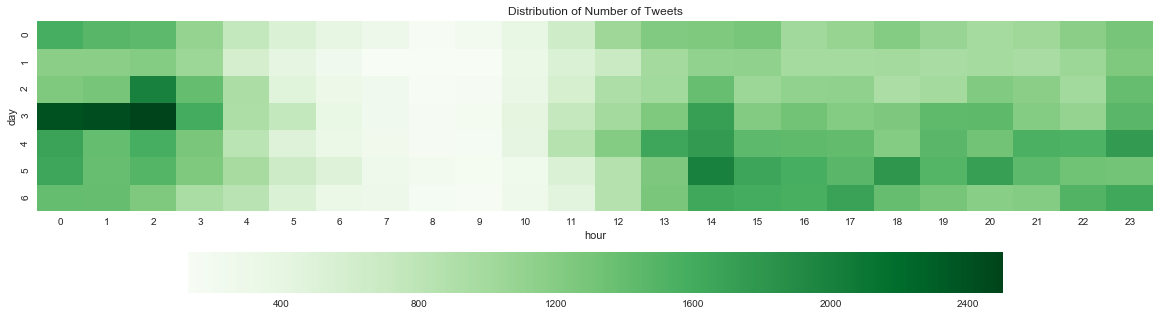

In [16]:
# Heatmap of positive Tweets

value_matrix = tweets[tweets["sentiment_verdict"] == "pos"][["day", "hour", "index"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "index")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap="Greens");
plt.title("Distribution of Number of Tweets");
plt.savefig(r"vis_img\positive_tweets_per_hour.png", dpi=300)

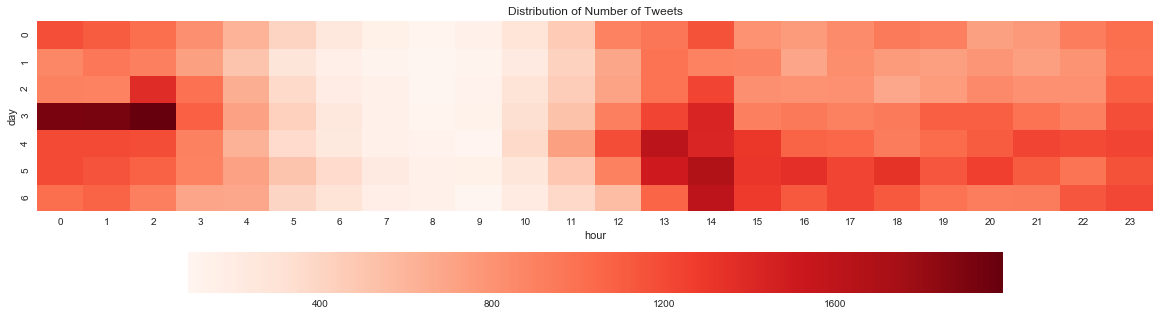

In [17]:
# Heatmap of negative Tweets

value_matrix = tweets[tweets["sentiment_verdict"] == "neg"][["day", "hour", "index"]]
value_matrix = value_matrix.groupby(["day", "hour"]).count().reset_index()
value_matrix = value_matrix.pivot("day", "hour", "index")
value_matrix = value_matrix.fillna(0)

for i in set(np.arange(0, 24)) - set(value_matrix.columns): # Fill in missing hours
    value_matrix[i] = 0
    
value_matrix = value_matrix.sort_index(axis=1)
value_matrix

plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.heatmap(value_matrix, cbar_kws={"orientation": "horizontal"}, cmap="Reds");
plt.title("Distribution of Number of Tweets");
plt.savefig(r"vis_img\negative_tweets_per_hour.png",dpi=300)

In [18]:
df = tweets[tweets["final_state"]!=0]
df = df[["final_state", "sentiment_verdict", "Tweet"]]

df = df.groupby(by=["final_state","sentiment_verdict"]).count()
#df

Tweet
final_state          sentiment_verdict       
Alabama              neg                 2171
                     pos                 4147
Alaska               neg                  302
                     pos                  365
Arizona              neg                 3928
                     pos                 4659
Arkansas             neg                  808
                     pos                 1122
California           neg                14517
                     pos                19576
Colorado             neg                 2476
                     pos                 2505
Connecticut          neg                  864
                     pos                  945
Delaware             neg                  329
                     pos                  362
District of Columbia neg                 1474
                     pos                 2282
Florida              neg                14607
                     pos                18591
Georgia              neg                 4147
                     pos                 4893
Hawaii               neg                  840
                     pos                 1028
Idaho                neg                  414
                     pos                  521
Illinois             neg                 4571
                     pos                 6397
Indiana              neg                 1695
                     pos                 2552
...                                       ...
Oklahoma             neg                  960
                     pos                 1437
Oregon               neg                 1676
                     pos                 1977
Pennsylvania         neg                 4190
                     pos                 6028
Rhode Island         neg                  245
                     pos                  335
South Carolina       neg                 1356
                     pos                 1990
South Dakota         neg                  114
                     pos                  144
Tennessee            neg                 2501
                     pos                 3050
Texas                neg                 9578
                     pos                15305
Utah                 neg                  729
                     pos                  730
Vermont              neg                  300
                     pos                  314
Virginia             neg                 3396
                     pos                 4598
Washington           neg                 2844
                     pos                 3701
West Virginia        neg                  268
                     pos                  378
Wisconsin            neg                 1617
                     pos                 2533
Wyoming              neg                   97
                     pos                  127

[102 rows x 1 columns]

In [19]:
#calculate the ratio of negative tweets per state

neg_ratio = {}
df = df.reset_index()

for x in range(0,102,2):
    y=x+1
    
    tot = df.iloc[x]["Tweet"]+df.iloc[y]["Tweet"]
    ratio = float(df.iloc[x]["Tweet"])/ tot
     
    neg_ratio[df.iloc[x]["final_state"]]=ratio

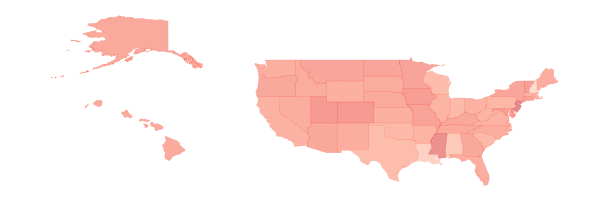

In [35]:
colorchoice = cm.Greens
col = "positive_ratio"

#uncomment these variables to save the other
#colorchoice = cm.Reds
#col = "negative_ratio"

df2 = pd.DataFrame(neg_ratio.items(), columns=["final_state","negative_ratio"])
df2["positive_ratio"] = 1-df2["negative_ratio"]
df2.rename(columns={"final_state": "STATE_NAME"}, inplace=True)

fname = 'states.geojson'
#read geojson file
dfg = gpd.read_file(fname)

df2 = dfg.merge(df2,on="STATE_NAME")


import matplotlib
from matplotlib import cm

def colorscale(x):
    #find maximum of the average age (plusminus two)
    max_ = df2[col].max() +0.15
    min_ = df2[col].min() -0.15
    
    #normalize the average ages 
    norm = matplotlib.colors.Normalize(vmin=min_, vmax=max_)
    
    #choose color map
    cmap = colorchoice
    
    #create the normalized color code
    m = cm.ScalarMappable(norm=norm, cmap= cmap)
    return m.to_rgba(x)

#create column with color values based on the average age
df2["COLOR"] = df2[col].apply(lambda x: colorscale(x))

def trs_shape(statename, offsetx, offsety, scalex, scaley):
    ##find geometry for a specific state
    _ = df2[df2["STATE_NAME"] == statename].geometry
    
    #https://shapely.readthedocs.io/en/latest/manual.html#affine-transformations
    #move the object
    _ = _.apply(lambda x: shapely.affinity.translate(x, xoff=offsetx, yoff=offsety))
    #scale the object
    _ = _.apply(lambda x: shapely.affinity.scale(x, xfact=scalex, yfact=scaley))
    _ = pd.DataFrame(_)
    
    #return only the geometry value
    return _.iloc[0,0]

S_DIR = '' 

with open(os.path.join(S_DIR, 'states.geojson')) as rf:    
    data = json.load(rf)
fig = plt.figure(figsize=(10,20)) 
ax = fig.gca()

for feature in data['features']:
    geometry = feature['geometry']
    
    ##change the size and position of Alaska
    if feature['properties']["STATE_NAME"] =="Alaska":
        poly = trs_shape("Alaska",5,-10,0.6,0.6)
        color = pd.DataFrame(df2[df2["STATE_NAME"] == feature['properties']["STATE_NAME"]].COLOR)
        color=  color.iloc[0,0]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color,  alpha=0.5, zorder=2))
    
    ##change the size and position of Hawaii
    elif feature['properties']["STATE_NAME"] =="Hawaii":
        poly = trs_shape("Hawaii",10,15,3.5,3.5)
        color = pd.DataFrame(df2[df2["STATE_NAME"] == feature['properties']["STATE_NAME"]].COLOR)
        color=  color.iloc[0,0]
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color,  alpha=0.5, zorder=2))
    
    elif geometry['type'] == 'Polygon':
        color = pd.DataFrame(df2[df2["STATE_NAME"] == feature['properties']["STATE_NAME"]].COLOR)
        color=  color.iloc[0,0]
        poly = geometry
        ax.add_patch(PolygonPatch(poly, fc=color, ec=color,  alpha=0.5, zorder=2))
        
    else:
        for polygon in geometry['coordinates'][0]:
            color = pd.DataFrame(df2[df2["STATE_NAME"] == feature['properties']["STATE_NAME"]].COLOR)
            color=  color.iloc[0,0]
            poly = Polygon(polygon)
            ax.add_patch(PolygonPatch(poly, fc=color, ec=color, alpha=0.5, zorder=2))

ax.axis('scaled')
plt.axis('off')

plt.savefig(r"vis_img\US_states_tweet_sentiment_" + col + ".png", dpi=300)
plt.show()

In [3]:
!pip install seaborn